In [211]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense , Dropout , Lambda, Flatten
from keras.optimizers import Adam ,RMSprop
from sklearn.model_selection import train_test_split
from keras import  backend as K
from keras.preprocessing.image import ImageDataGenerator

In [212]:
# create the training & test sets, skipping the header row with [1:]
train = pd.read_csv("train.csv")
print(train.shape)
train.head(10)


(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [213]:
test= pd.read_csv("test.csv")
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [214]:
# train.iloc[:,1:]

In [215]:
X_train = (train.iloc[:,1:].values).astype('float32') # all pixel values
y_train = train.iloc[:,0].values.astype('int32') # only labels i.e targets digits
X_test = test.values.astype('float32')

In [216]:
# X_test

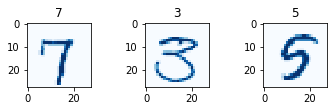

In [217]:
#Convert train datset to (num_images, img_rows, img_cols) format 
X_train = X_train.reshape(X_train.shape[0], 28, 28)

for i in range(6, 9):
    plt.subplot(330 + (i+1))
    plt.imshow(X_train[i], cmap=plt.get_cmap('Blues'))
    plt.title(y_train[i]);

In [218]:
y_train[8] 

5

In [219]:
#expand 1 more dimention as 1 for colour channel gray
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_train.shape

(42000, 28, 28, 1)

In [220]:
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
X_test.shape

(28000, 28, 28, 1)

In [221]:
# X_train[0]

In [222]:
X_train.std()

78.67759

In [223]:
mean_px = X_train.mean().astype(np.float32)
std_px = X_train.std().astype(np.float32)

def standardize(x):
    print("hello" + str(x) )
    return (x-mean_px)/std_px

In [224]:
print(y_train)
print(y_train[6])

[1 0 1 ... 7 6 9]
7


In [225]:
from keras.utils.np_utils import to_categorical
y_train= to_categorical(y_train)
num_classes = y_train.shape[1]
num_classes

10

In [226]:
y_train.shape[0]

42000

In [227]:
print(y_train)
print(y_train[6])

[[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


/home/rakesh0035123/anaconda3/envs/MyEnvi/lib/python3.6/site-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


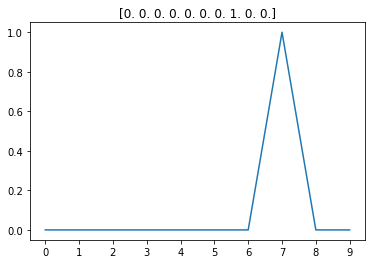

In [228]:
plt.title(y_train[6])
plt.plot(y_train[6])
plt.xticks(range(10));

In [229]:
from keras.models import  Sequential
from keras.layers.core import  Lambda , Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Convolution2D , MaxPooling2D

In [230]:
from keras import layers
from keras import models
model= Sequential()
model.add(layers.Conv2D(64,(5,5),activation='relu',input_shape=(28, 28,1)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32,(4,4),activation='relu'))
model.add(layers.MaxPooling2D((2, 2))) 

model.add(layers.Flatten())          
model.add(Dense(10, activation='softmax'))

model.summary()          
print("input shape ",model.input_shape)
print("output shape ",model.output_shape)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 24, 24, 64)        1664      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 9, 9, 32)          32800     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                5130      
Total params: 39,594
Trainable params: 39,594
Non-trainable params: 0
__________________________________________________

In [231]:
from keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(lr=0.001),
 loss='categorical_crossentropy',
 metrics=['accuracy'])


In [232]:
from sklearn.model_selection import train_test_split
X = X_train
y = y_train
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

In [233]:
model.fit(X_train, y_train,batch_size=1000,epochs=10,verbose=1)

Epoch 1/10
33600/33600 [==============================] - 14s 402us/step - loss: 7.7679 - accuracy: 0.5135
Epoch 2/10
33600/33600 [==============================] - 13s 394us/step - loss: 0.6929 - accuracy: 0.8094
Epoch 3/10
33600/33600 [==============================] - 13s 391us/step - loss: 0.3332 - accuracy: 0.9054
Epoch 4/10
33600/33600 [==============================] - 13s 394us/step - loss: 0.2552 - accuracy: 0.9347
Epoch 5/10
33600/33600 [==============================] - 13s 395us/step - loss: 0.1283 - accuracy: 0.9615
Epoch 6/10
33600/33600 [==============================] - 13s 395us/step - loss: 0.0971 - accuracy: 0.9713
Epoch 7/10
33600/33600 [==============================] - 13s 395us/step - loss: 0.0737 - accuracy: 0.9772
Epoch 8/10
33600/33600 [==============================] - 13s 396us/step - loss: 0.0574 - accuracy: 0.9824
Epoch 9/10
33600/33600 [==============================] - 13s 396us/step - loss: 0.0433 - accuracy: 0.9860
Epoch 10/10
33600/33600 [============

In [234]:
print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [235]:
test_loss, test_acc = model.evaluate(X_val, y_val)
print('Test accuracy:', test_acc)

8400/8400 [==============================] - 1s 135us/step
Test accuracy: 0.9825000166893005


In [236]:
validate_num = model.predict_classes(X_val)

In [237]:
print(validate_num)

[8 1 9 ... 3 0 9]


In [238]:
# data = {'validate_predict': validate_num}

In [239]:
validation = pd.DataFrame()

In [240]:
validation['validate_predict']  = validate_num

In [241]:
# validation['validate_predict']

In [242]:
print(validation.head())

   validate_predict
0                 8
1                 1
2                 9
3                 9
4                 8


In [243]:
X_test.shape

(28000, 28, 28, 1)

In [244]:
submission_sam = pd.read_csv("sample_submission.csv")

In [245]:
print(submission_sam.head())

   ImageId  Label
0        1      0
1        2      0
2        3      0
3        4      0
4        5      0


In [246]:
test_mdl_pre = model.predict_classes(X_test)
test_model_df = pd.DataFrame()
test_model_df['test_prediction']  = test_mdl_pre
print(test_model_df.head())

   test_prediction
0                2
1                0
2                9
3                9
4                3


In [247]:
print(submission_sam.shape)
print(test_model_df.shape)

(28000, 2)
(28000, 1)


In [248]:
submission_sam['Label'] = test_model_df['test_prediction'].values

In [249]:
print(submission_sam.head())
print(submission_sam.tail()) 

   ImageId  Label
0        1      2
1        2      0
2        3      9
3        4      9
4        5      3
       ImageId  Label
27995    27996      9
27996    27997      7
27997    27998      3
27998    27999      9
27999    28000      2


In [250]:
submission_sam.to_csv('final submission.csv',index = False)